# Power Outages

**Name(s)**: Karsin Dass & Cole Doyle

**Website Link**: https://keemarice.github.io/PowerOutages/

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
pd.options.plotting.backend = 'plotly'

# from lec_utils import * # Feel free to uncomment and use this. It'll make your plotly graphs look like ours in lecture!

## Introduction

In [2]:
outageFull = pd.read_csv('outage.csv', usecols = list(range(2, 56)), header = 0, skiprows=5,) #with units

## Data Cleaning and Exploratory Data Analysis

### Cleaning

In [3]:
outageClean = outageFull[["YEAR", "U.S._STATE", "POSTAL.CODE", "NERC.REGION", "CAUSE.CATEGORY", "OUTAGE.DURATION", "DEMAND.LOSS.MW", "CUSTOMERS.AFFECTED"	]]
outageClean = outageClean.iloc[1:]
outageClean[['YEAR', 'OUTAGE.DURATION']].dropna()
outageClean['YEAR'] = pd.to_numeric(outageClean['YEAR'])
outageClean['OUTAGE.DURATION'] = pd.to_numeric(outageClean['OUTAGE.DURATION'])
outageClean['DEMAND.LOSS.MW'] = pd.to_numeric(outageClean['DEMAND.LOSS.MW'])
outageClean['CUSTOMERS.AFFECTED'] = pd.to_numeric(outageClean['CUSTOMERS.AFFECTED'])

outageClean

,YEAR,U.S._STATE,POSTAL.CODE,NERC.REGION,CAUSE.CATEGORY,OUTAGE.DURATION,DEMAND.LOSS.MW,CUSTOMERS.AFFECTED
1,2011.0,Minnesota,MN,MRO,severe weather,3060.0,NaN,70000.0
2,2014.0,Minnesota,MN,MRO,intentional attack,1.0,NaN,NaN
3,2010.0,Minnesota,MN,MRO,severe weather,3000.0,NaN,70000.0
4,2012.0,Minnesota,MN,MRO,severe weather,2550.0,NaN,68200.0
5,2015.0,Minnesota,MN,MRO,severe weather,1740.0,250.0,250000.0
...,...,...,...,...,...,...,...,...
1530,2011.0,North Dakota,ND,MRO,public appeal,720.0,155.0,34500.0
1531,2006.0,North Dakota,ND,MRO,fuel supply emergency,NaN,1650.0,NaN
1532,2009.0,South Dakota,SD,RFC,islanding,59.0,84.0,NaN
1533,2009.0,South Dakota,SD,MRO,islanding,181.0,373.0,NaN


### Univariate Analysis

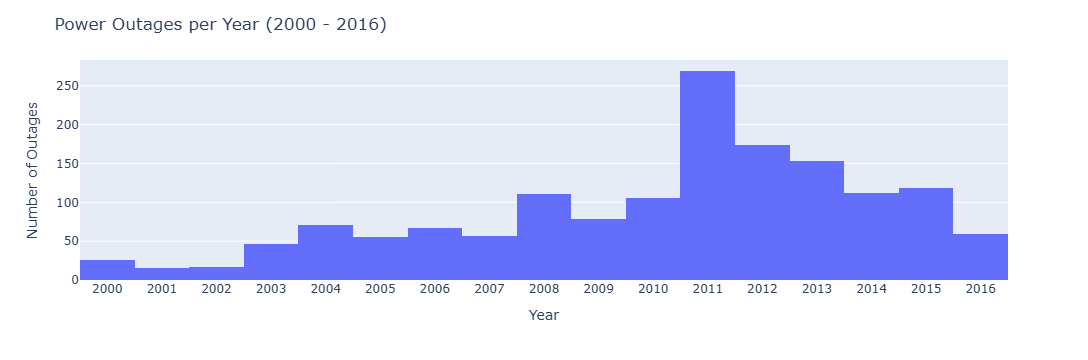

In [22]:
fig = px.histogram(outageClean, x = 'YEAR', nbins = 17)
fig.update_layout(title = "Power Outages per Year (2000 - 2016)", xaxis_title = "Year", yaxis_title = "Number of Outages")
fig.update_layout(
   xaxis = dict(
      tickmode = 'linear',
      tick0 = 2000,
      dtick = 1
   )
)
fig.show()


In [24]:
small = outageClean[outageClean["OUTAGE.DURATION"] < 10000]

fig = px.histogram(x = small['OUTAGE.DURATION'])
fig.update_layout(title = "Distribution of Outage Duration", xaxis_title = "Outage Duration (minutes)", yaxis_title = "Number of Outages")



### Bivariate Analysis

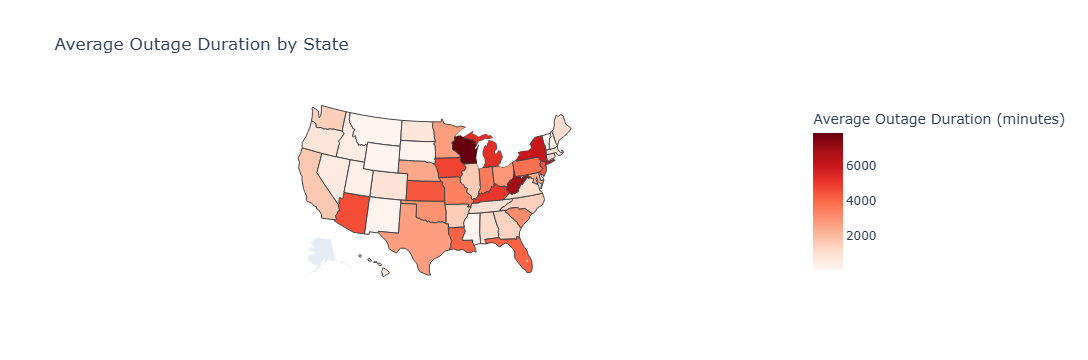

In [25]:
durationstate = outageClean.groupby("POSTAL.CODE")["OUTAGE.DURATION"].mean().reset_index()

fig = px.choropleth(
    durationstate,
    locations="POSTAL.CODE",  
    locationmode="USA-states",  
    color="OUTAGE.DURATION",  # depper red = more customers affected
    scope="usa", 
    title="Average Outage Duration by State",
    color_continuous_scale="Reds",
    labels={"OUTAGE.DURATION": "Average Outage Duration (minutes)"},
)
fig.show()



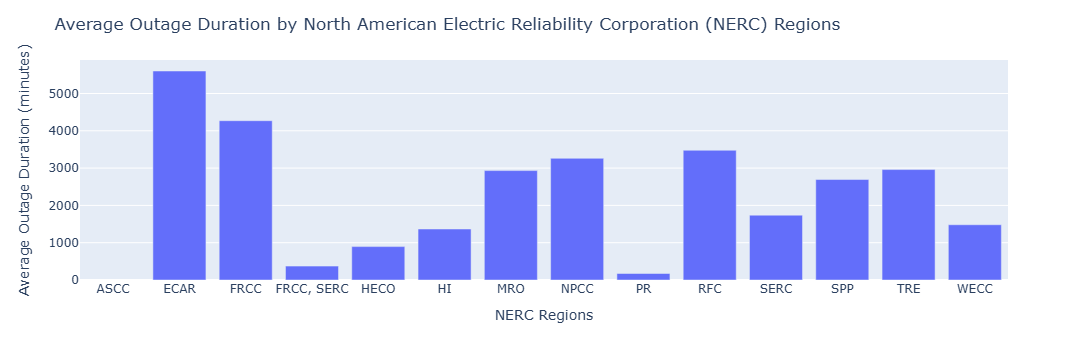

In [26]:
durationregion = outageClean.groupby("NERC.REGION")["OUTAGE.DURATION"].mean().reset_index()

fig = px.bar(durationregion, x = 'NERC.REGION', y = 'OUTAGE.DURATION')
fig.update_layout(title = "Average Outage Duration by North American Electric Reliability Corporation (NERC) Regions", xaxis_title = "NERC Regions", yaxis_title = "Average Outage Duration (minutes)")

fig.show()



### Interesting Aggreates

In [39]:
outageClean.groupby('YEAR')['OUTAGE.DURATION'].mean().reset_index()

,YEAR,OUTAGE.DURATION
0,2000.0,2843.076923
1,2001.0,1272.071429
2,2002.0,4751.000000
3,2003.0,4652.434783
4,2004.0,4368.788732
5,2005.0,5288.944444
6,2006.0,3329.530303
7,2007.0,2336.666667
8,2008.0,4184.018182
9,2009.0,3660.519481
